In [175]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
import seaborn as sbn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


# Poblation

In [425]:
poblation= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating,  mb.original_title, mb.genres
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null
  AND mr.numvotes < 948394
  AND mb.runtime_minutes < 600
  ORDER BY mr.numvotes DESC
  


  
  
  ;
""", conn)
#  AND mr.numvotes < 948394
#  AND mb.runtime_minutes < 300 AND mb.runtime_minutes > 30
#  AND mr.numvotes > 100000
#ORDER BY mr.numvotes, mb.runtime_minutes DESC
#AND mr.numvotes > 400000
#  AND mr.averagerating > 6
poblation.info()
#poblation.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65702 entries, 0 to 65701
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  65702 non-null  float64
 1   numvotes         65702 non-null  int64  
 2   averagerating    65702 non-null  float64
 3   original_title   65702 non-null  object 
 4   genres           65702 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.5+ MB


In [426]:
poblation.describe()

,runtime_minutes,numvotes,averagerating
count,65702.000000,65702.000000,65702.000000
mean,93.635064,3804.866427,6.320407
std,23.713557,28903.896286,1.458682
min,3.000000,5.000000,1.000000
25%,81.000000,16.000000,5.500000
50%,91.000000,62.000000,6.500000
75%,104.000000,352.000000,7.300000
max,500.000000,820847.000000,10.000000


In [427]:
p_mean=poblation["numvotes"].mean()
p_std=poblation["numvotes"].std()
print(p_mean,p_std)

3804.866427201607 28903.89628592919


# Sample

In [434]:
condition= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
  AND mb.runtime_minutes < 130 AND mb.runtime_minutes > 90
  AND mr.numvotes < 948394
  ORDER BY mb.runtime_minutes DESC
  ;
""", conn)
#  AND mr.numvotes < 948394
#  AND mr.numvotes > 250000
#ORDER BY mr.numvotes, mb.runtime_minutes DESC
#AND mr.numvotes > 400000
#  AND mr.averagerating > 6
condition.info()
#poblation.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28839 entries, 0 to 28838
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  28839 non-null  float64
 1   numvotes         28839 non-null  int64  
 2   averagerating    28839 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 676.0 KB


In [439]:
#condition.describe()
sample1=condition.sample(650)
sample1.describe()

,runtime_minutes,numvotes,averagerating
count,650.000000,650.000000,650.000000
mean,104.440000,7984.824615,6.313846
std,10.067581,45358.106995,1.304145
min,91.000000,5.000000,1.000000
25%,96.000000,25.000000,5.600000
50%,102.000000,140.000000,6.450000
75%,111.000000,719.250000,7.200000
max,129.000000,553751.000000,9.400000


In [440]:
s_mean=sample1["numvotes"].mean()
s_std=sample1["numvotes"].std()
print(s_mean,s_std)

7984.824615384616 45358.10699455434


# Z-score

In [441]:
z = (s_mean - p_mean)/(p_std/np.sqrt(650))
z

3.6869922581895818

In [442]:
print(1 - stats.norm.cdf(z))

0.00011346012886293


In [433]:
stats.norm.cdf(z)

0.7247440228024473

# Correlation

## Sample

In [443]:
cr_s_run=list(sample1["runtime_minutes"])

cr_s_rat=list(sample1["numvotes"])
#print(cr_s_run,cr_s_votes)

No handles with labels found to put in legend.


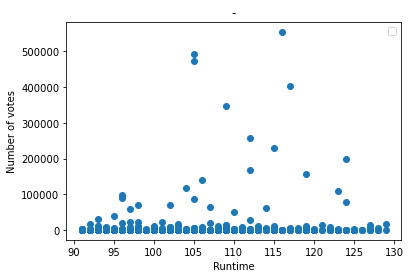

In [444]:
fig, ax = plt.subplots()

ax.scatter(cr_s_run, cr_s_rat)
#label="actual data"

#ax.plot(cr_s_run, y_bounds, "--", label="perfect correlation")

ax.set_title("-")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

ax.legend();

## Poblation

In [395]:
cr_p_run=list(poblation["runtime_minutes"])
cr_p_rat=list(poblation["numvotes"])
len(cr_p_run)
#print(cr_s_run,cr_s_votes)

65702

No handles with labels found to put in legend.


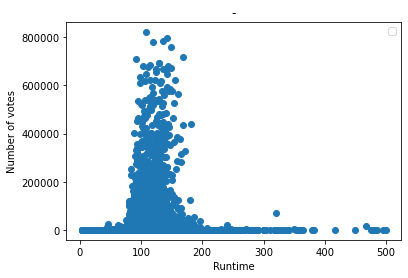

In [396]:
fig, ax = plt.subplots()

ax.scatter(cr_p_run, cr_p_rat)
#label="actual data"


ax.set_title("-")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

ax.legend();

In [92]:
nueva1= pd.read_sql("""
SELECT mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
 
  ORDER BY mr.numvotes, mb.runtime_minutes DESC
  
  
  ;
""", conn)
#
nueva1.head()

,averagerating
0,8.6
1,5.8
2,7.2
3,8.0
4,6.8


In [106]:
allruntime= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating, mb.genres
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
 
  ORDER BY mb.runtime_minutes DESC
  
  
  ;
""", conn)
#
allruntime.head(20)
# AND mr.numvotes > 40000
# GROUP BY mb.genres

,runtime_minutes,numvotes,averagerating,genres
0,51420.0,17,5.0,Documentary
1,14400.0,69,6.2,Documentary
2,1440.0,219,8.9,Drama
3,1100.0,5,8.6,"Comedy,History"
4,808.0,100,8.5,"Drama,Fantasy,Musical"
5,746.0,162,8.2,Documentary
6,724.0,59,8.5,Documentary
7,720.0,19,7.8,Documentary
8,607.0,218,9.3,Documentary
9,601.0,22,8.6,Drama


In [56]:
run=list(allruntime["runtime_minutes"])
votes=list(allruntime["numvotes"])
#print(run,rat)
correlation = np.corrcoef(run,votes)
correlation[0][1]

0.01242764319536531

In [57]:
covariance = np.cov(run,votes)
covariance[0][1]

83495.60323921194

In [58]:
rm=sum(run)/65720
rst=np.std(run)
rst

209.37542392280452

In [59]:
rm

94.7322732805843

In [61]:
vm=sum(votes)/65720
vst=np.std(votes)
print(vm, vst)

3954.6738435788193 32087.99038387164


In [83]:
# plotrun=allruntime["runtime_minutes"]
# plotrun.info()

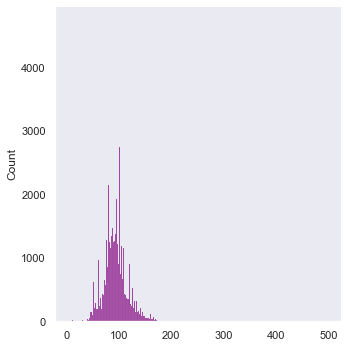

In [449]:
sbn.set(style='dark',)
sbn.displot(cr_p_run, color='purple')

## Hypothesis